In [1]:
# Primeiro passo é sempre importar o Qiskit

from qiskit import *

# Começando o circuito

In [2]:
q = Qr = QuantumRegister(2, 'q') # Registrando 2 bit quântico no meu Circuito

In [3]:
Cr = ClassicalRegister(2, 'c') # Registrando 2 bit clássico no meu Circuito

In [4]:
circuit = QuantumCircuit(Qr, Cr) #criando o circuito
circuit.reset(Qr[0]) #resetar esse qubit

In [5]:
%matplotlib inline 
#premite plotar gráficos no caderno
circuit.draw()

q_0: ─|0>─
          
q_1: ─────
          
c: 2/═════

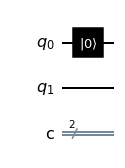

In [6]:
circuit.draw(output = 'mpl')

# Vizualizando na Esfera de Bloch

In [7]:
from qiskit.visualization import plot_bloch_multivector

In [8]:
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(circuit, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


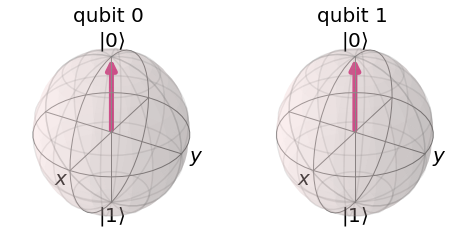

In [9]:
plot_bloch_multivector(vector_de_estado)

# Realizando Medidas

In [10]:
circuit.measure(Qr, Cr)

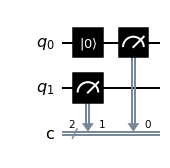

In [11]:
circuit.draw(output = 'mpl')

# Simulando Seus Resultados

In [12]:
# Vamos usar o elemento ar para simular o circuito no nosso computador;

simular = Aer.get_backend('qasm_simulator')

In [13]:
execute(circuit, backend = simular)

In [14]:
resultado = execute(circuit, backend = simular).result()

# Plotando Seus Resultados

In [15]:
from qiskit.visualization import plot_histogram

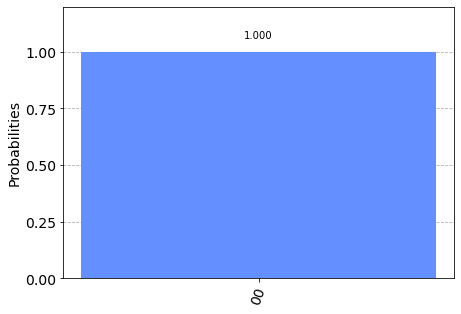

In [16]:
plot_histogram(resultado.get_counts(circuit))

# Vamos Colocar a "Mão na Massa"!

# Portas de 2 qbit

## 1) Exercício

# Porta Y na base $\vert 0 \rangle$

In [17]:
exemploX = QuantumCircuit(Qr, Cr) 
exemploX.reset(Qr[0]) #resetar esse qubit
exemploX.y(Qr[0]) #adicionando a porta Y

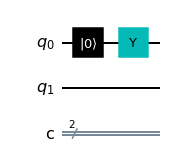

In [18]:
exemploX.draw(output = 'mpl')

[0.-0.j 0.+1.j 0.-0.j 0.+0.j]


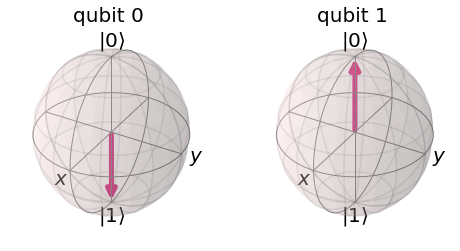

In [19]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploX, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

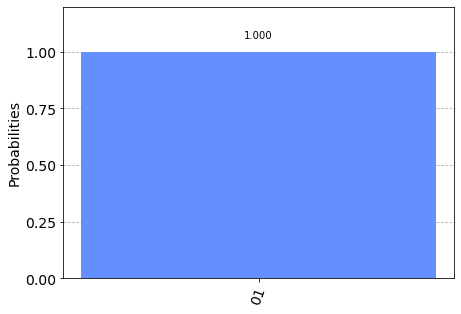

In [20]:
exemploX.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploX, backend = simular)
resultado = execute(exemploX, backend = simular).result()
plot_histogram(resultado.get_counts(exemploX))

## Como podemos ver, a porta Y tem função semelhante a porta X na base $\vert 0 \rangle$, dado que ambas geram uma matriz inversa. O histogramada gerado nesta primeira porta Y foi com probabilidade igual a 100% no vetor 01.

# Porta Y na base $\vert 1 \rangle$

In [21]:
exemploX = QuantumCircuit(Qr, Cr) 
exemploX.reset(Qr[1]) #resetar esse qubit
exemploX.y(Qr[1]) #adicionando a porta Y

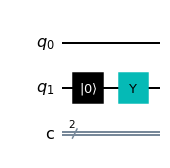

In [22]:
exemploX.draw(output = 'mpl')

[0.-0.j 0.-0.j 0.+1.j 0.+0.j]


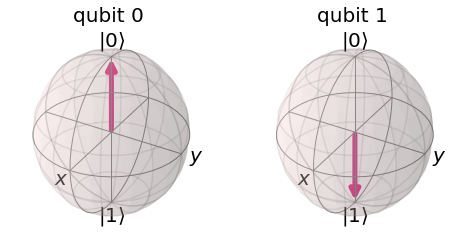

In [23]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploX, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

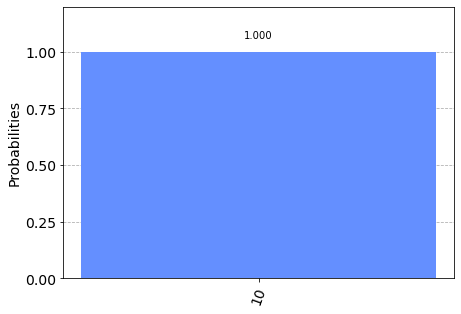

In [24]:
exemploX.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploX, backend = simular)
resultado = execute(exemploX, backend = simular).result()
plot_histogram(resultado.get_counts(exemploX))

## Como já comentei anteriormente, a semelhante entre as portas Y e X nas base $\vert 0 \rangle$ e $\vert 1 \rangle$ é algo notório, dado que em ambas obtemos uma matriz inversa. A única diferença existente entre essas duas portas X (Not) e Y, é que a porta Y nos dá uma adição por um número complexo quando operada no estado 1, isto é, quando operada na base $\vert 1 \rangle$ obtemos o estado -j + $\vert 0 \rangle$. O histograma obtido nos dá 100% da probabilidade de ser 10.

# Porta Z na base: $\vert 0 \rangle$

### A porta Z não faz nada com os vetores da base computacional, somente adiciona o sinal negativo a base: Z $\vert 1 \rangle$ = - $\vert 1 \rangle$. Vale esclarecer que isso se dá porque as bases computacionais $\vert 0 \rangle$ e $\vert 1 \rangle$ são autovetores da matriz Z.

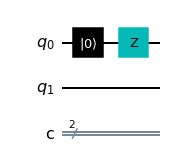

In [43]:
exemploX = QuantumCircuit(Qr, Cr) 
exemploX.reset(Qr[0]) #resetar esse qubit
exemploX.z(Qr[0]) #adicionando a porta Z
exemploX.draw(output = 'mpl')

[ 1.+0.j -0.+0.j  0.+0.j -0.+0.j]


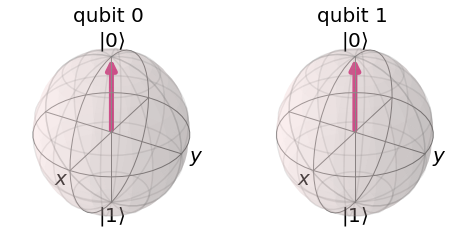

In [44]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploX, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

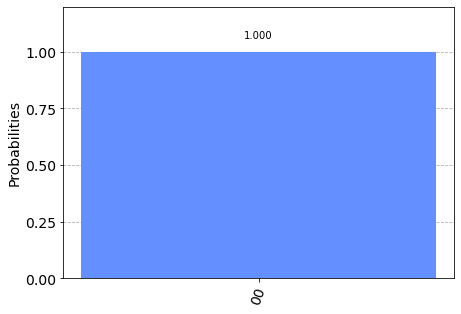

In [45]:
exemploX.measure(Qr, Cr)
simular = Aer.get_backend('statevector_simulator')
execute(exemploX, backend = simular)
resultado = execute(exemploX, backend = simular).result()
plot_histogram(resultado.get_counts(exemploX))

## A porta Z não faz nada com o vetor $\vert 0 \rangle$, dado isso, temos um histograma com 100% de probabilidade em 00.

# Porta Z na base: $\vert 1 \rangle$

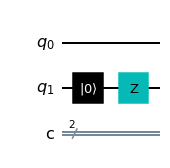

In [34]:
exemploX = QuantumCircuit(Qr, Cr) 
exemploX.reset(Qr[1]) #resetar esse qubit
exemploX.z(Qr[1]) #adicionando a porta Z
exemploX.draw(output = 'mpl')

[ 1.+0.j  0.+0.j -0.+0.j -0.+0.j]


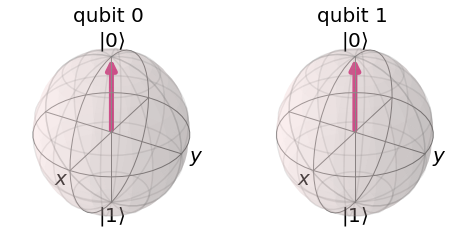

In [37]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploX, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

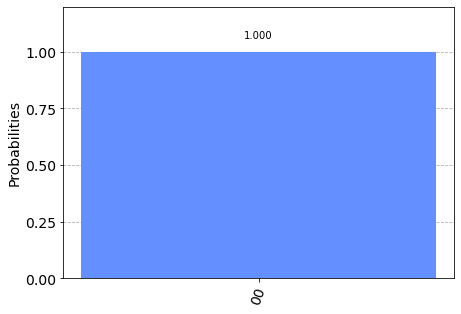

In [42]:
exemploX.measure(Qr, Cr)
simular = Aer.get_backend('statevector_simulator')
execute(exemploX, backend = simular)
resultado = execute(exemploX, backend = simular).result()
plot_histogram(resultado.get_counts(exemploX))

## Como a porta Z somente adiciona o sinal de menos na base computacional $\vert 1 \rangle$, temos um histograma com 100% de probabilidade em 00.

# Porta Hadamard na base: $\vert 0 \rangle$

## Como a porta H é a somas das portas Z e X, temos: 

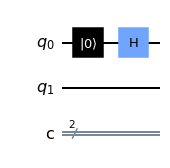

In [46]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[0]) #resetar esse qubit
exemploH.h(Qr[0]) #adicionando a porta hadamard
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


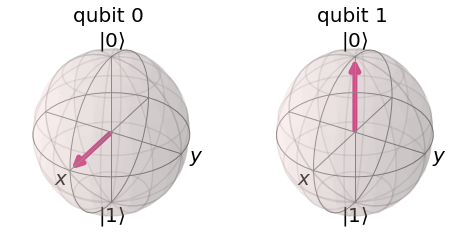

In [47]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

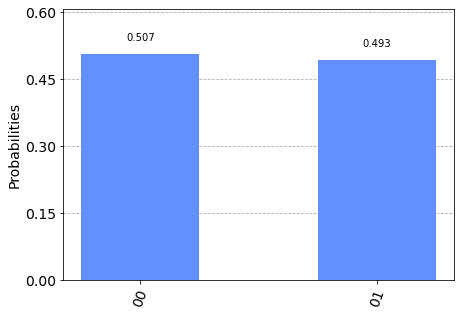

In [48]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## A porta Hadamard nos dá a normalização do sistemas, ou também chamado de probabilidade, que é basicamente a representação das supeposições de um sistema. Como estamos trabalhando com dois qubit, temos 50% na base $\vert 1 \rangle$ e 50% na base $\vert 0 \rangle$.

# Porta Hadamard na base: $\vert 1 \rangle$

## A porta responsavél por nos dá a probabilidade do sistema é a porta Hadamard.

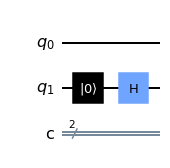

In [49]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[1]) #resetar esse qubit
exemploH.h(Qr[1]) #adicionando a porta hadamard
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


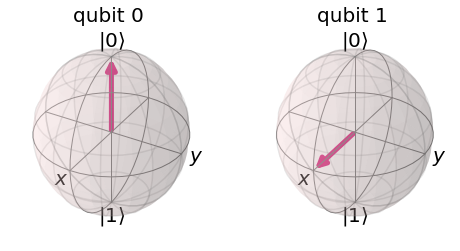

In [50]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

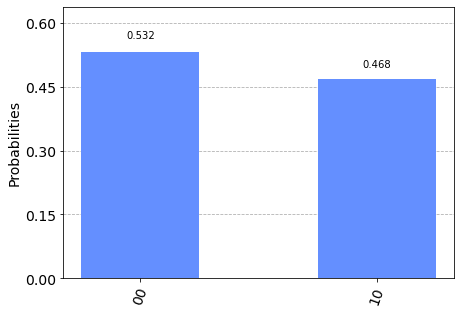

In [51]:
c

## Este histograma nos dá a informação de que também temos a probabilidade de 50% em $\vert 0 \rangle$ e 50% em $\vert 1 \rangle$, com um certo acumulo de erros. 

# Porta Hadamard e Porta Not na base: $\vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

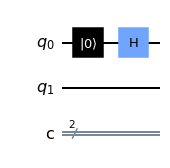

In [52]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[0]) #resetar esse qubit
exemploH.h(Qr[0]) #adicionando a porta hadamard
exemploX.x(Qr[0]) #adicionando a porta NOT
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


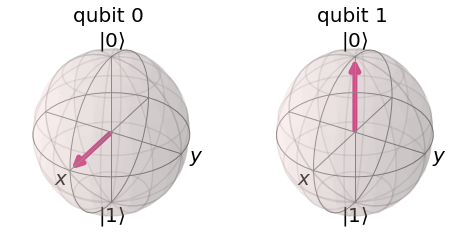

In [53]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

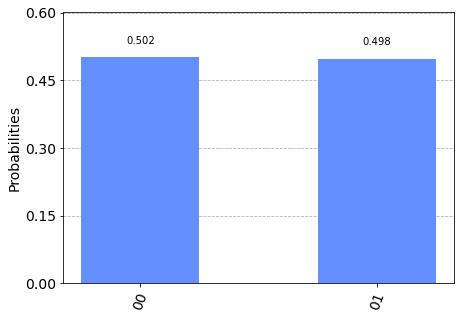

In [54]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## Como já sabemos, a porta Hadamard faz a análise probabilistica dos meus sistema, e, como adicionamos uma porta not, temos que o histograma obtido da base $\vert 0 \rangle$  explicita a probabilidade de 50% em 00 e 50% em 01, com um certo acumulo de erros. 

# Porta Hadamard e Porta Not na base: $\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

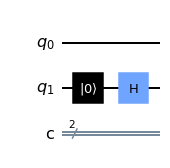

In [55]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[1]) #resetar esse qubit
exemploH.h(Qr[1]) #adicionando a porta hadamard
exemploX.x(Qr[1]) #adicionando a porta NOT
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


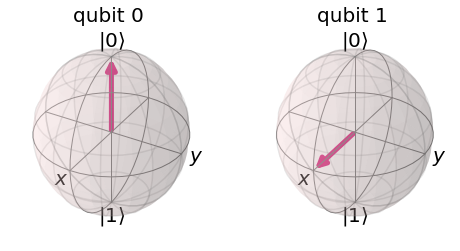

In [56]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

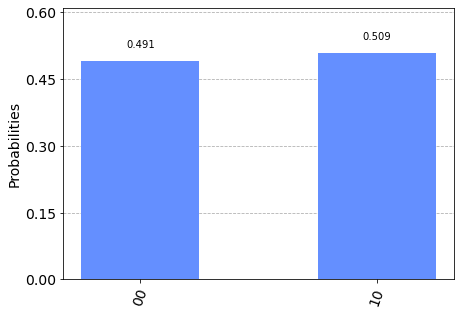

In [57]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## Diferente do histograma anterior ($\vert 0 \rangle$), o histograma $\vert 1 \rangle$ aplicado às portas H e X nos dá a probabilidade de 50% em 00 e 50% 10.

# Porta Hadamard e Porta Y na base: $ \vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

## A porta Y age de modo semelhante a porta X, porém, a porta Y adiciona números complexos ao vetores da base. Dado isso, temos:

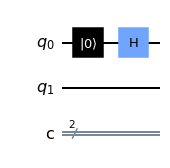

In [58]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[0]) #resetar esse qubit
exemploH.h(Qr[0]) #adicionando a porta hadamard
exemploX.y(Qr[0]) #adicionando a porta Y
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


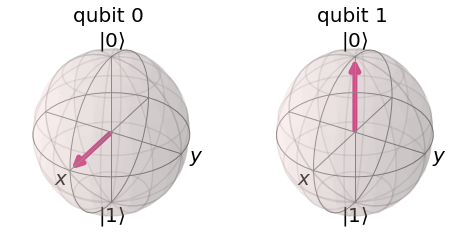

In [59]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

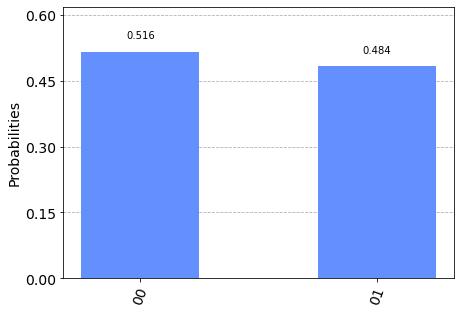

In [60]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## O histograma apresenta a probabilidade em 50% do estado expirar em 00, e igual probabilidade do estado expirar em 01.

# Porta Hadamard e Porta Y na base: $\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

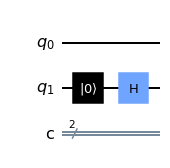

In [61]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[1]) #resetar esse qubit
exemploH.h(Qr[1]) #adicionando a porta hadamard
exemploX.y(Qr[1]) #adicionando a porta Y
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


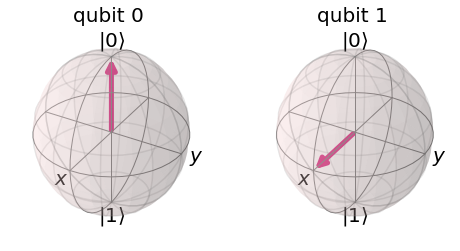

In [62]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

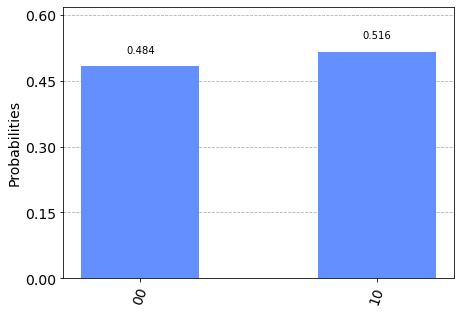

In [63]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## O histograma impresso nos dá a probabilidade de 50% no estado 00,  e 50% no estado 10 

# Porta Hadamard e Porta Z na base: $ \vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

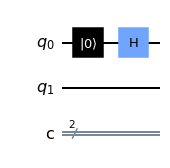

In [64]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[0]) #resetar esse qubit
exemploH.h(Qr[0]) #adicionando a porta hadamard
exemploX.z(Qr[0]) #adicionando a porta Z
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]


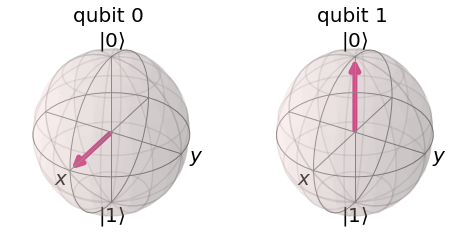

In [65]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert + \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle + \vert 1 \rangle\right)$

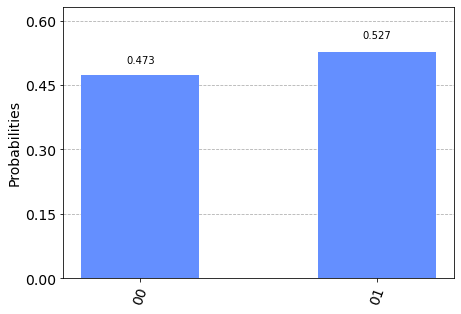

In [66]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## Neste histograma temos a demonstração probabilistica de um sistema operado com as portas Hadamard e Z, a resultante desta representação dá-nos a seguinte informaçõ: O sistema tem 50% de probabilidade de esta no vetor 00 e 50% de esta no vetor 01, ocorrendo um acumulo de erro que até o momento é desconhecido.  

# Porta Hadamard e Porta Z na base: $\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

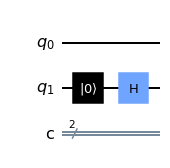

In [67]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[1]) #resetar esse qubit
exemploH.h(Qr[1]) #adicionando a porta hadamard
exemploX.z(Qr[1]) #adicionando a porta Z
exemploH.draw(output = 'mpl')

[0.70710678+0.j 0.        +0.j 0.70710678+0.j 0.        +0.j]


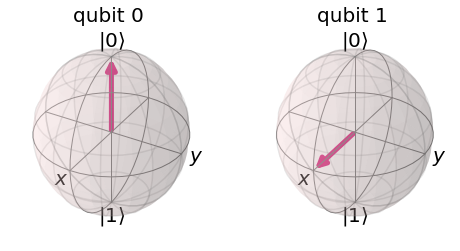

In [68]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

$\vert - \rangle = \frac{1}{\sqrt{2}} \left( \vert 0 \rangle - \vert 1 \rangle\right)$

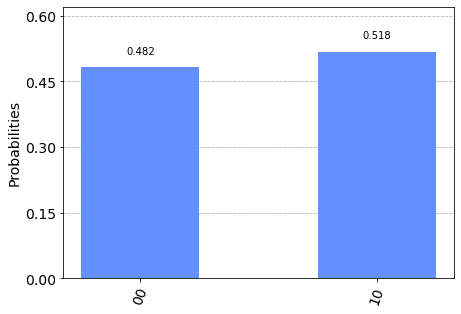

In [69]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## A demonstração gráfica que se ver é um medidor probabilistico (histograma), este medidor probabilistico afirma ter 50% de chance do vetor esta na coordenada 00, e 50% de esta em 10. 

## 3) execício

## Aplicação de 2  a portas Hadamard em $\vert 0 \rangle$

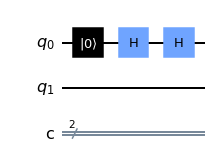

In [70]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[0]) #resetar esse qubit
exemploH.h(Qr[0]) #adicionando a porta hadamard
exemploH.h(Qr[0])
exemploH.draw(output = 'mpl')

[1.-6.123234e-17j 0.+6.123234e-17j 0.+0.000000e+00j 0.+0.000000e+00j]


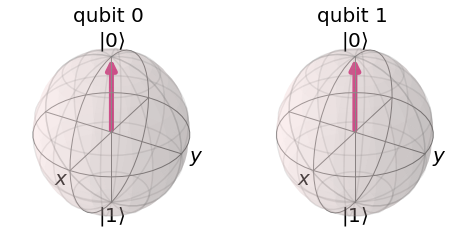

In [71]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

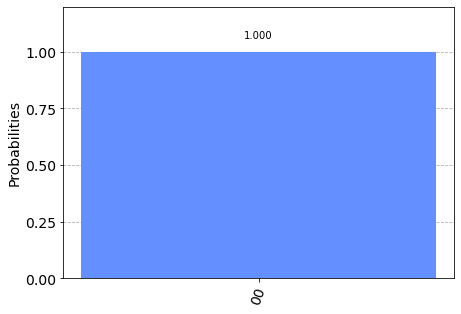

In [72]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## O presente histograma apresenta uma probabilidade de 100% do vetor  $\vert 0 \rangle$ está na coordenada 00.

## Aplicação de 2 portas Hadamard em $\vert 1 \rangle$

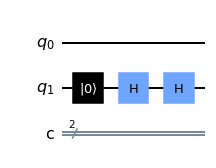

In [74]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[1]) #resetar esse qubit
exemploH.h(Qr[1]) #adicionando a porta hadamard
exemploH.h(Qr[1])
exemploH.draw(output = 'mpl')

[1.-6.123234e-17j 0.+0.000000e+00j 0.+6.123234e-17j 0.+0.000000e+00j]


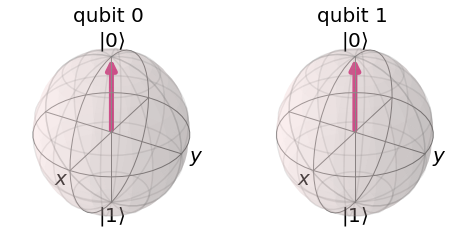

In [75]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

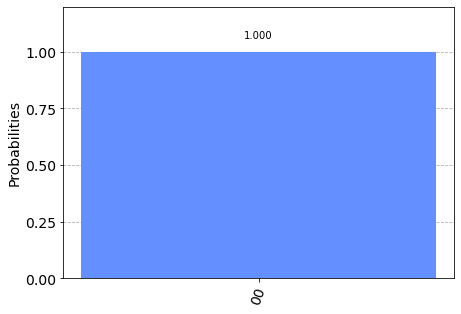

In [76]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## Este histograma apresenta uma probabilidade de 100% do vetor  $\vert 1 \rangle$ está na coordenada 00. Dado que neste sistema tem duas portas Hadamard atuando.

## 4) Execício

## Aplicação das portas Hadamard, Z e Hadamard em $\vert 0 \rangle$

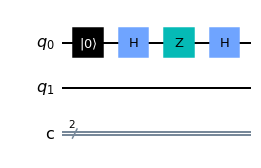

In [77]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[0]) #resetar esse qubit
exemploH.h(Qr[0]) #adicionando a porta hadamard
exemploH.z(Qr[0])
exemploH.h(Qr[0])
exemploH.draw(output = 'mpl')

[0.+6.123234e-17j 1.-6.123234e-17j 0.+0.000000e+00j 0.+0.000000e+00j]


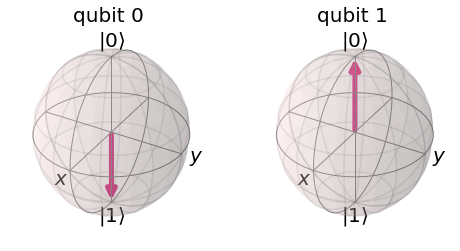

In [78]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

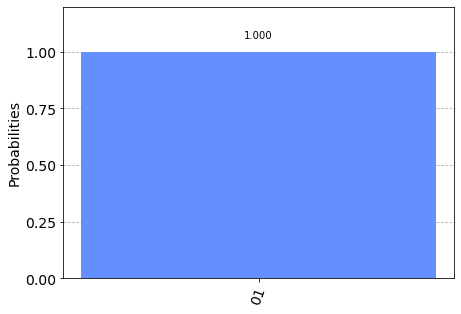

In [79]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## O presente histograma apresenta uma probabilidade de 100% do vetor  $\vert 0 \rangle$ está na coordenada 01. Isso ocorre porque a atuação de duas porta Hadamard e uma porta Z resulta no inverso do qubit inicial.

## Aplicação das portas Hadamard, Z e Hadamard em $\vert 1 \rangle$

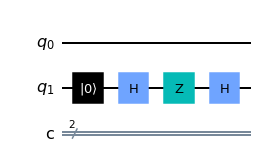

In [80]:
exemploH = QuantumCircuit(Qr, Cr) #criando o circuito
exemploH.reset(Qr[1]) #resetar esse qubit
exemploH.h(Qr[1]) #adicionando a porta hadamard
exemploH.z(Qr[1])
exemploH.h(Qr[1])
exemploH.draw(output = 'mpl')

[0.+6.123234e-17j 0.+0.000000e+00j 1.-6.123234e-17j 0.+0.000000e+00j]


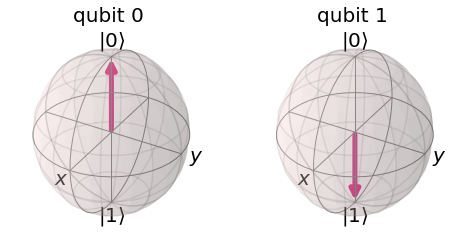

In [81]:
#vamos ver a acção da portas lógicas na esfera de bloch
simulador = Aer.get_backend('statevector_simulator')
resultado = execute(exemploH, backend=simulador).result()
vector_de_estado = resultado.get_statevector()
print(vector_de_estado)
plot_bloch_multivector(vector_de_estado)

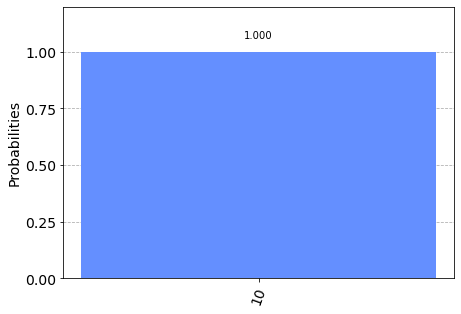

In [82]:
exemploH.measure(Qr, Cr)
simular = Aer.get_backend('qasm_simulator')
execute(exemploH, backend = simular)
resultado = execute(exemploH, backend = simular).result()
plot_histogram(resultado.get_counts(exemploH))

## O  histograma explicita uma probabilidade de 100% do vetor  $\vert 1 \rangle$ está na coordenada 10. Isso ocorre pois a atuação de duas porta Hadamard faz o sistema formar um grau de 180 em relação ao seu eixo inicial, logo, após a aplicação das duas porta H o vetor $\vert 1 \rangle$ estaria no lugar do vetor $\vert 0 \rangle$,  e atuando sobre esse mesmo sistema uma porta Z, que é capaz de inverter o vetor $\vert 1 \rangle$, obtemos um histograma com 100% de probabilidade no 10.

# Exercícios:

1. Aplique as portas Y e Z em cada qbit da base computacional $\lbrace  \vert 0 \rangle,  \vert 1 \rangle \rbrace$. Mostre cada resultado na Esfera de Bloch e Plote as distribuições de probabilidade e comente o resultados. (b) Aplique as Porta X, Y e Z no estado  $\vert + \rangle=\frac{1}{\sqrt{2}}\left(\vert 0 \rangle + \vert 1 \rangle\right)$, mostre o estado na esfera de Bloch antes e depois da Aplicação da Porta, mostre a distribuição do resultado e comente o resultado de cada porta. 


2. (a) Aplique a Porta Hadamard no qbit $\vert 1 \rangle$. (b) Mostre na esfera de Bloch que o resultado será o vetor $\vert - \rangle=\frac{1}{\sqrt{2}}\left(\vert 0 \rangle - \vert 1 \rangle\right)$. (c) Plote a distribuição de probablilidade de estados.

3. O que acontece se aplicamos a porta Hadamard duas vezes seguidas nos estados da base computacional  $\lbrace  \vert 0 \rangle,  \vert 1 \rangle \rbrace$? Comente o Resultado.

4. Utilizando as Portas Hadamard e Z mostre que a sequência de portas HZH equivale a aplicação da porta X nos estados $\lbrace  \vert 0 \rangle,  \vert 1 \rangle \rbrace$. Mostre cada resultado na Esfera de Bloch e Plote as distribuições de probabilidade e comente o resultados.